In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
import graphviz

In [57]:
data = pd.read_excel("Data/dataproject2024.xlsx")

# Separate features and target
X = data.drop(columns=["Pred_default (y_hat)"])  
X = X.drop(columns=["PD","Group","Default (y)","ID"])
y = data["Default (y)"]  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train a decision tree regressor as the surrogate model
surrogate_model = DecisionTreeRegressor(max_depth=4)
surrogate_model.fit(X_train, y_train)

# Make predictions with the surrogate model
y_pred_surrogate = surrogate_model.predict(X_test)

# Evaluate the surrogate model
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the surrogate model: {r2}")
print(X.head())

R-squared for the surrogate model: 0.07003844314489782
   Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
0          34   55       4875            3087             0             36   
1           5   29      13000           13000             0             60   
2          14   38      17190           14190             0             60   
3          16   37      22773           23568             0             48   
4           1   61       7700            8526             0             48   

   Monthly payment  Credit event  Married  Homeowner  
0         0.047895             0        1          1  
1         0.091667             0        0          0  
2         0.088235             0        0          0  
3         0.110084             0        1          1  
4         0.123404             0        1          0  


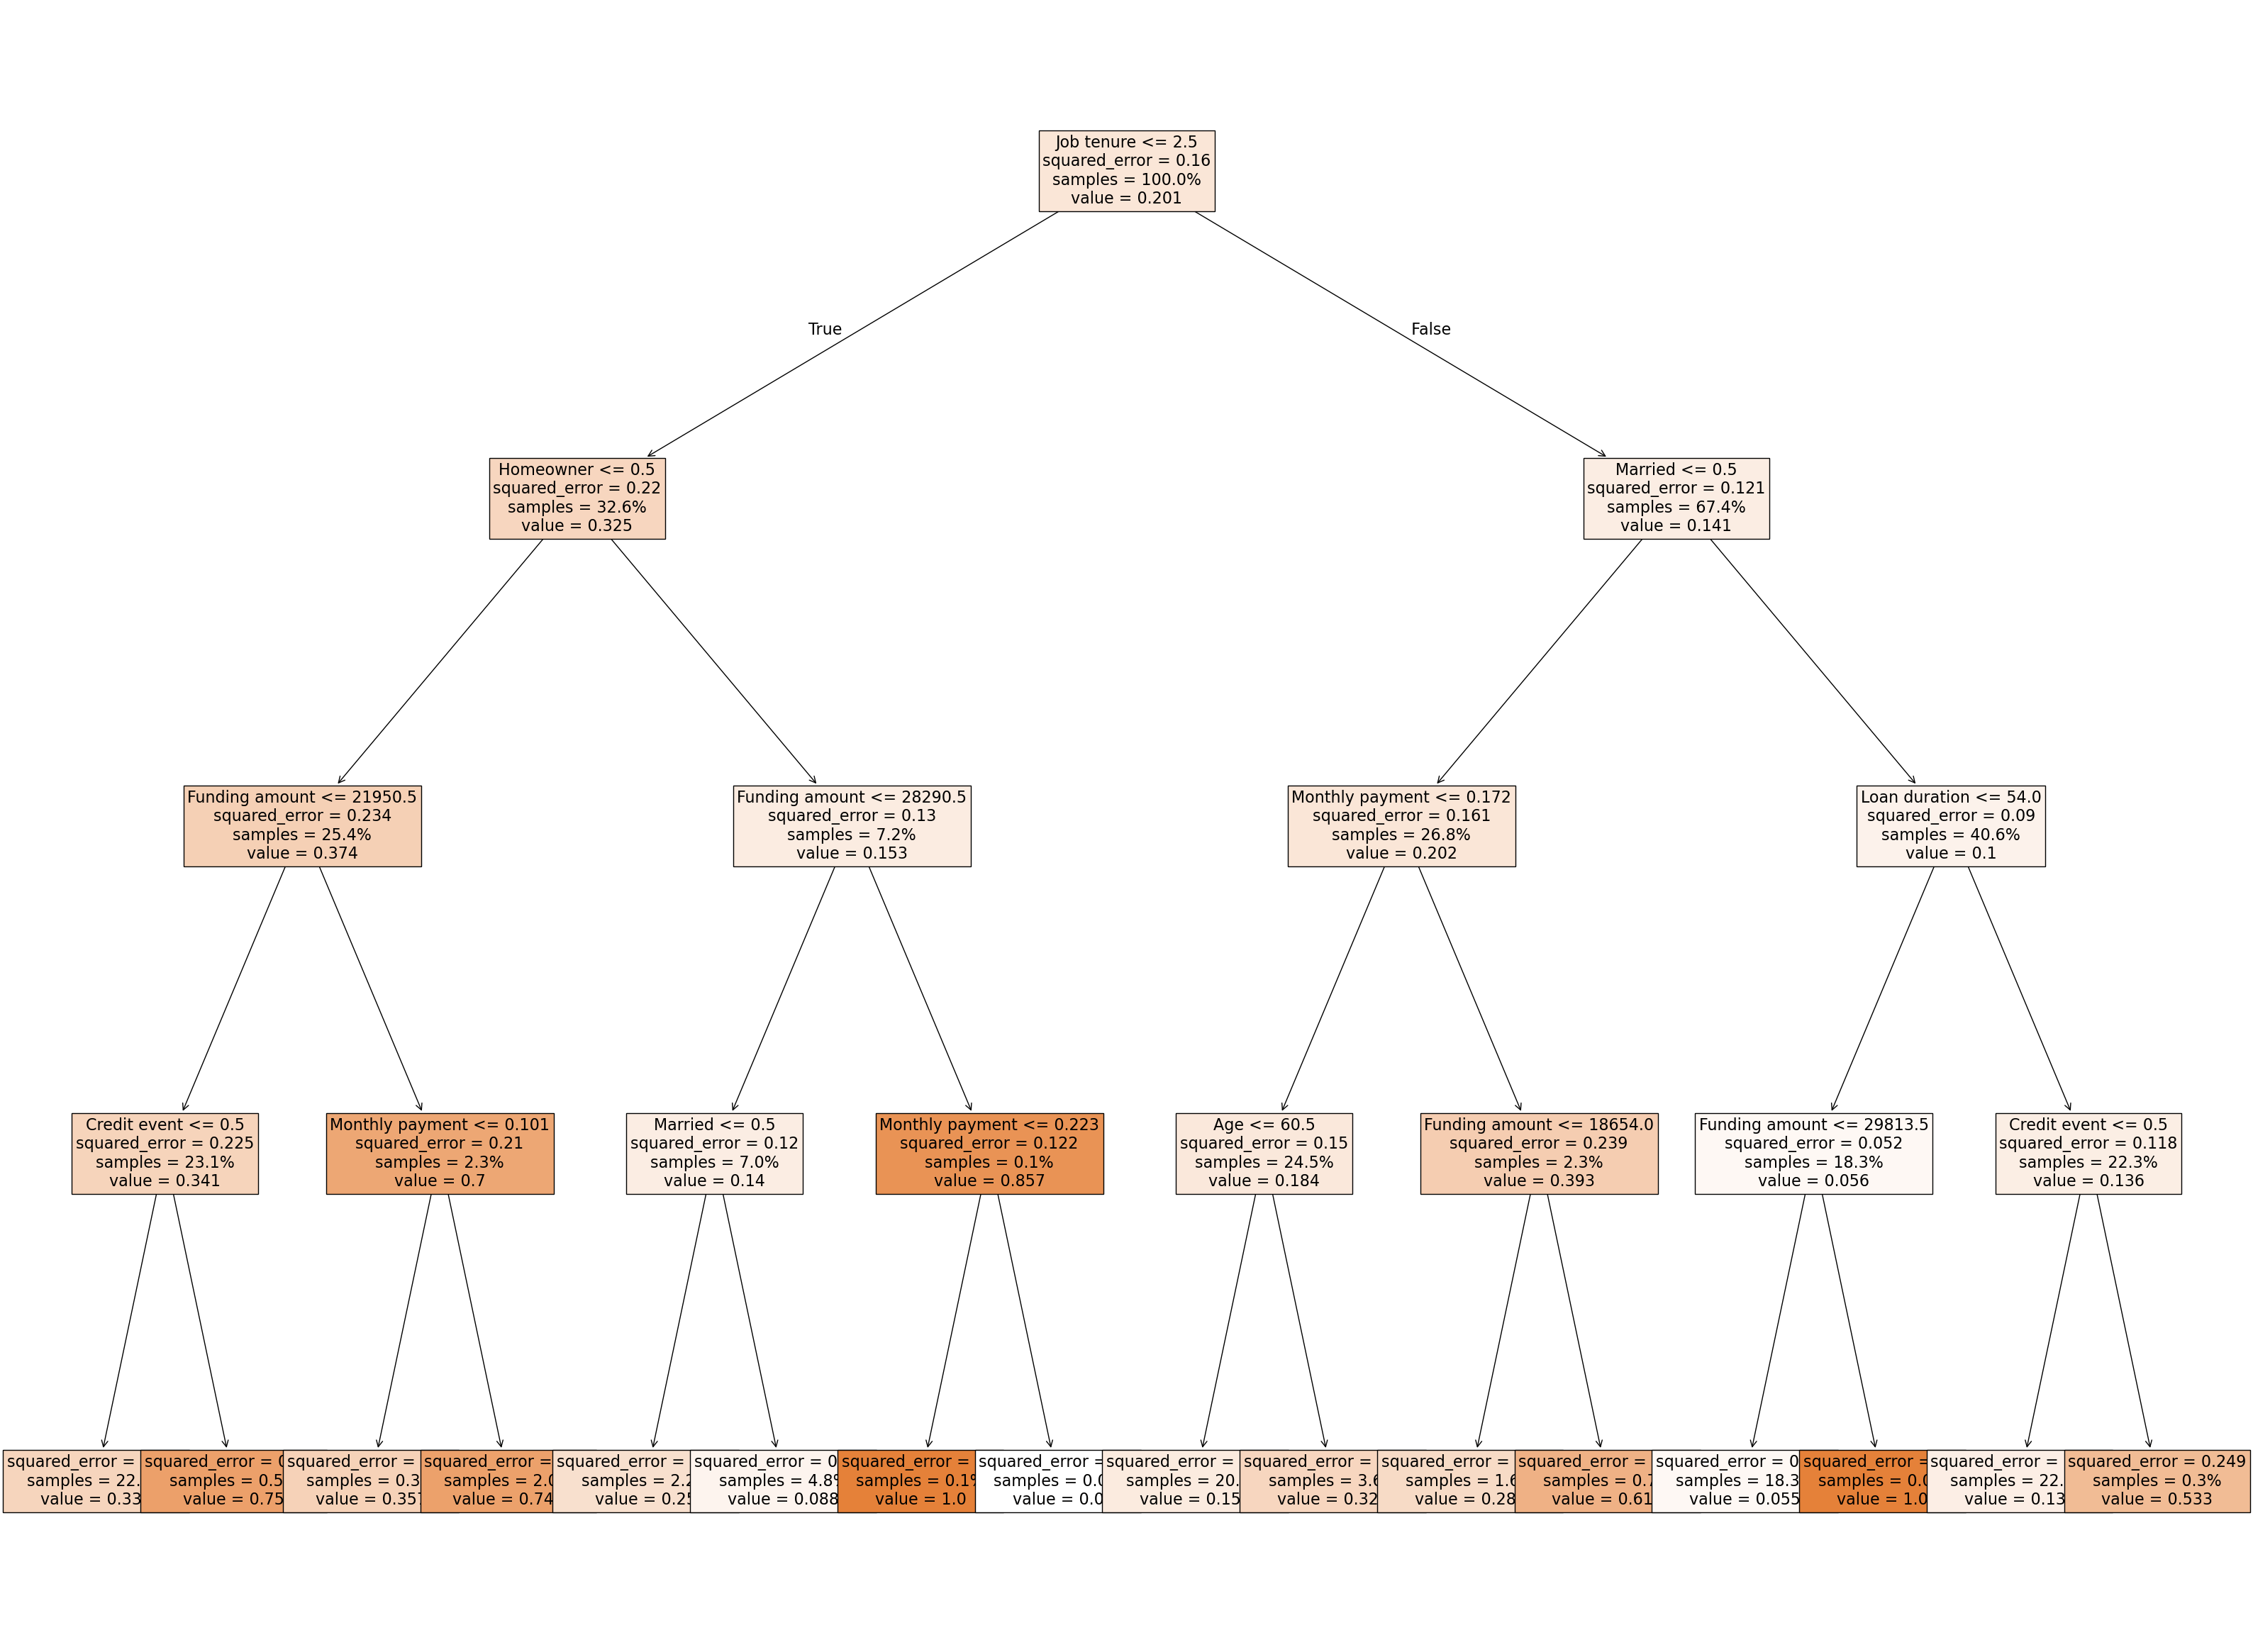

In [58]:
plt.figure(figsize=(40, 30), dpi=100)  # Larger figure size and higher dpi
plot_tree(
    surrogate_model, 
    feature_names=X.columns, 
    filled=True, 
    fontsize=16,  # Slightly reduce font size for better fit
    proportion=True
)
plt.show()

In [54]:
# Train a Random Forest surrogate model
surrogate_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
surrogate_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_surrogate = surrogate_model.predict(X_test)
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the Random Forest surrogate model: {r2}")

R-squared for the Random Forest surrogate model: 0.15249459902404494


In [55]:
# Train a Gradient Boosting surrogate model
surrogate_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)
surrogate_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_surrogate = surrogate_model.predict(X_test)
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the Gradient Boosting surrogate model: {r2}")

R-squared for the Gradient Boosting surrogate model: 0.15605557737493214


We tried using more complex models like Random Forest and Gradient Boost. Although we lose interpretability, the R² improves by 100% compared to the original simple model. This indicates that the black-box model is very complex, and approximating it through a simple interpretable model proves to be very challenging, hence the R² of 7%.

In [61]:
# Export as dot file
dot_data = export_graphviz(
    surrogate_model, 
    out_file=None, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Use Graphviz to visualize the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves the file as decision_tree.pdf
graph.view()

'decision_tree.pdf'